In [2]:
import matplotlib.pyplot as plt
import pickle
import glob
import os
import numpy as np

C:\monet\monet\src/interpolating
[(1, 0.8397499918937683), (2, 0.8314999938011169), (5, 0.8230000019073487), (7, 0.8235000014305115), (9, 0.8274999976158142), (10, 0.8264999985694885), (15, 0.8232500076293945), (20, 0.8200000047683715), (25, 0.8335000038146972)]
[1, 2, 5, 7, 9, 10, 15, 20, 25]
[0.8397499918937683, 0.8314999938011169, 0.8230000019073487, 0.8235000014305115, 0.8274999976158142, 0.8264999985694885, 0.8232500076293945, 0.8200000047683715, 0.8335000038146972]


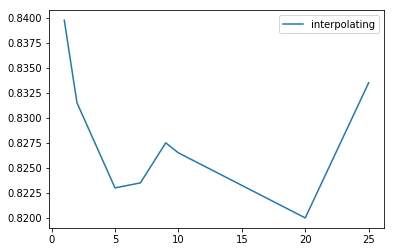

In [9]:
folder = "interpolating"
sizes = []
max_val_acc = []
dir_path = os.getcwd() + "/" + folder
print(dir_path)
matching_files = glob.glob( dir_path +"\*_history*")

for file in matching_files:
    with open(file, 'rb') as handle:
        history = pickle.loads(handle.read())
        train_loss = history['loss']
        val_loss   = history['val_loss']
        train_acc  = history['acc']
        val_acc    = history['val_acc']

        max_val_acc.append(np.mean(sorted(val_acc, reverse=True)[:5]))
    string = [s for s in file if s.isdigit()]
    actualstring = ""
    for s in string:
        actualstring += s
    sizes.append(int(actualstring))
zipped = zip(sizes, max_val_acc)
sorted_pairs = sorted(zipped)
sizes = [sorted_pairs[i][0] for i in range(len(sorted_pairs))]
max_val_acc = [sorted_pairs[i][1] for i in range(len(sorted_pairs))]
print(sorted_pairs)
print(sizes)
print(max_val_acc)
if folder == "added_layers":
    folder = "avgpoolfivedense"
plt.plot(sizes, max_val_acc, label=folder)
plt.legend()